In [1]:
# Importing all the necessary modules to process our excel file
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import ExcelFile
from pandas import ExcelWriter
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 2- Regressors Algorithm'

In [3]:
%pwd

'C:\\Users\\Dr_Sam\\Desktop\\CHM SESSION JULY-NOV 2023\\WISDOM CLASS\\DATA SCIENCE-MACHINE LEARNING\\(WISDOM) Lecture 2- Regressors Algorithm'

In [11]:
# First task is to import the raw Excel file for processing purpose
filename = r'Final_PAH_Data_Teacher_v2.xlsx'

initial_df = pd.read_excel(filename,sheet_name='Sheet1',index_col=0,skiprows=0,usecols="A:P")
initial_df

,Lf(mm),Null1,Fuel,Prim_MH_to_MC,Prim_H_to_C,Null2,Mixture,Sec_H_to_C,Sec_fuel_Percent,MC_Sec_Fuel,Total_H_to_C,PAH,GRPAH,Experiments,Experiment_Num
S/No,,,,,,,,,,,,,,,
1,1.243198,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,696.493698,412.717406,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,930.999998,495.480126,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1187.902926,572.576728,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1504.963994,655.339447,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,C2H4,28,0.166667,2.0,0% CH4,16,4,0.00,0.0,2.00,1838.769810,732.436049,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,5.763478,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,13.355160,6.625981,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,17.107886,8.029326,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,CH4,16,0.333333,4.0,7% H2,2,10000,0.07,0.0,4.14,21.247527,9.335789,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [12]:
# Identifiying columns with Nan Values
for cols in initial_df.columns:
    print(f'\t{cols:<17}: {initial_df[cols].isna().sum()} NaN Values')

	Lf(mm)           : 0 NaN Values
	Null1            : 0 NaN Values
	Fuel             : 0 NaN Values
	Prim_MH_to_MC    : 0 NaN Values
	Prim_H_to_C      : 0 NaN Values
	Null2            : 0 NaN Values
	Mixture          : 0 NaN Values
	Sec_H_to_C       : 0 NaN Values
	Sec_fuel_Percent : 0 NaN Values
	MC_Sec_Fuel      : 0 NaN Values
	Total_H_to_C     : 0 NaN Values
	PAH              : 0 NaN Values
	GRPAH            : 0 NaN Values
	Experiments      : 0 NaN Values
	Experiment_Num   : 0 NaN Values


In [13]:
initial_df.columns

Index(['Lf(mm)', 'Null1', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Null2',
       'Mixture', 'Sec_H_to_C', 'Sec_fuel_Percent', 'MC_Sec_Fuel',
       'Total_H_to_C', 'PAH', 'GRPAH', 'Experiments', 'Experiment_Num'],
      dtype='object')

In [15]:
needed_df = initial_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C',
       'Mixture', 'MC_Sec_Fuel','Total_H_to_C', 'PAH','Experiments', 'Experiment_Num']]
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [16]:
# Printing out the Entire Raw Excel Data for confirmation
needed_df = pd.DataFrame(needed_df)
#df = df.apply(pd.to_numeric, errors='coerce')
needed_df = needed_df.fillna(0)

#df.at[0:12,7:11] = np.round(df.loc[0:12,7:11],3)
needed_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493698,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,930.999998,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902926,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963994,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769810,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275610,16,0.333333,4.0,2,0.0,4.14,17.107886,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752386,16,0.333333,4.0,2,0.0,4.14,21.247527,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [17]:
# Describe the Df
needed_df.describe()

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000
mean,4.635456,34.164134,0.208376,2.500507,9.340426,2.576900,2.812361,5144.381616
std,1.888055,8.568666,0.049455,0.593456,6.997036,3.149325,0.599230,10726.740271
min,1.243198,16.000000,0.166667,2.000000,2.000000,0.000000,2.000000,0.578278
25%,3.252817,28.000000,0.166667,2.000000,2.000000,0.000000,2.290000,140.442594
50%,4.756371,30.000000,0.166667,2.000000,16.000000,0.000000,2.830000,603.990562
75%,6.261701,42.000000,0.250000,3.000000,16.000000,5.400000,3.150000,3652.125250
max,7.769544,44.000000,0.333333,4.000000,16.000000,9.600000,4.400000,68329.872942


In [18]:
# Checking the datatypes
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lf(mm)          658 non-null    float64
 1   Fuel            658 non-null    int64  
 2   Prim_MH_to_MC   658 non-null    float64
 3   Prim_H_to_C     658 non-null    float64
 4   Mixture         658 non-null    int64  
 5   MC_Sec_Fuel     658 non-null    float64
 6   Total_H_to_C    658 non-null    float64
 7   PAH             658 non-null    float64
 8   Experiments     658 non-null    object 
 9   Experiment_Num  658 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 56.5+ KB


In [19]:
# Extracting the columns
list(needed_df.columns)

['Lf(mm)',
 'Fuel',
 'Prim_MH_to_MC',
 'Prim_H_to_C',
 'Mixture',
 'MC_Sec_Fuel',
 'Total_H_to_C',
 'PAH',
 'Experiments',
 'Experiment_Num']

In [21]:
# Assigning he appropriate Datatypes
int_list = ['Fuel','Mixture']
for column in int_list:
    needed_df[column] = needed_df[column].astype('int16')
    
float_list = ['Lf(mm)','Prim_MH_to_MC','Prim_H_to_C','MC_Sec_Fuel','Total_H_to_C','PAH']
for column in float_list:
    needed_df[column] = needed_df[column].astype('float32')

category_list = ['Experiments','Experiment_Num']
for column in category_list:
    needed_df[column] = needed_df[column].astype('category')
    
needed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 658 entries, 1 to 658
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Lf(mm)          658 non-null    float32 
 1   Fuel            658 non-null    int16   
 2   Prim_MH_to_MC   658 non-null    float32 
 3   Prim_H_to_C     658 non-null    float32 
 4   Mixture         658 non-null    int16   
 5   MC_Sec_Fuel     658 non-null    float32 
 6   Total_H_to_C    658 non-null    float32 
 7   PAH             658 non-null    float32 
 8   Experiments     658 non-null    category
 9   Experiment_Num  658 non-null    category
dtypes: category(2), float32(6), int16(2)
memory usage: 29.4 KB


In [22]:
# Descriptions of the target column
needed_df["PAH"].describe()

count      658.000000
mean      5144.381348
std      10726.740234
min          0.578278
25%        140.442596
50%        603.990570
75%       3652.125305
max      68329.875000
Name: PAH, dtype: float64

In [23]:
# To find the correlation among
# the columns using pearson method
needed_df.corr(method ='pearson')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.035710,0.113368,0.113368,-0.174055,-0.138855,0.103584,0.264378
Fuel,-0.035710,1.000000,-0.430037,-0.430037,0.133413,0.024778,-0.461671,0.343496
Prim_MH_to_MC,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Prim_H_to_C,0.113368,-0.430037,1.000000,1.000000,-0.104386,-0.051028,0.898047,-0.385709
Mixture,-0.174055,0.133413,-0.104386,-0.104386,1.000000,0.779961,0.023220,-0.022269
MC_Sec_Fuel,-0.138855,0.024778,-0.051028,-0.051028,0.779961,1.000000,0.242672,-0.142470
Total_H_to_C,0.103584,-0.461671,0.898047,0.898047,0.023220,0.242672,1.000000,-0.472044
PAH,0.264378,0.343496,-0.385709,-0.385709,-0.022269,-0.142470,-0.472044,1.000000


In [24]:
# To find the correlation among
# the columns using kendall method
needed_df.corr(method ='kendall')

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH
Lf(mm),1.000000,-0.010749,0.056950,0.056950,-0.148113,-0.111276,0.048764,0.190991
Fuel,-0.010749,1.000000,0.005870,0.005870,0.121702,0.033828,-0.065779,0.158192
Prim_MH_to_MC,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Prim_H_to_C,0.056950,0.005870,1.000000,1.000000,-0.008658,0.031179,0.744296,-0.639414
Mixture,-0.148113,0.121702,-0.008658,-0.008658,1.000000,0.733017,0.092638,0.039856
MC_Sec_Fuel,-0.111276,0.033828,0.031179,0.031179,0.733017,1.000000,0.283041,-0.070198
Total_H_to_C,0.048764,-0.065779,0.744296,0.744296,0.092638,0.283041,1.000000,-0.637223
PAH,0.190991,0.158192,-0.639414,-0.639414,0.039856,-0.070198,-0.637223,1.000000


In [25]:
needed_df.columns

Index(['Lf(mm)', 'Fuel', 'Prim_MH_to_MC', 'Prim_H_to_C', 'Mixture',
       'MC_Sec_Fuel', 'Total_H_to_C', 'PAH', 'Experiments', 'Experiment_Num'],
      dtype='object')

In [26]:
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [31]:
data_df = needed_df.copy()
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [28]:
## Understanding which features are very important for prediction

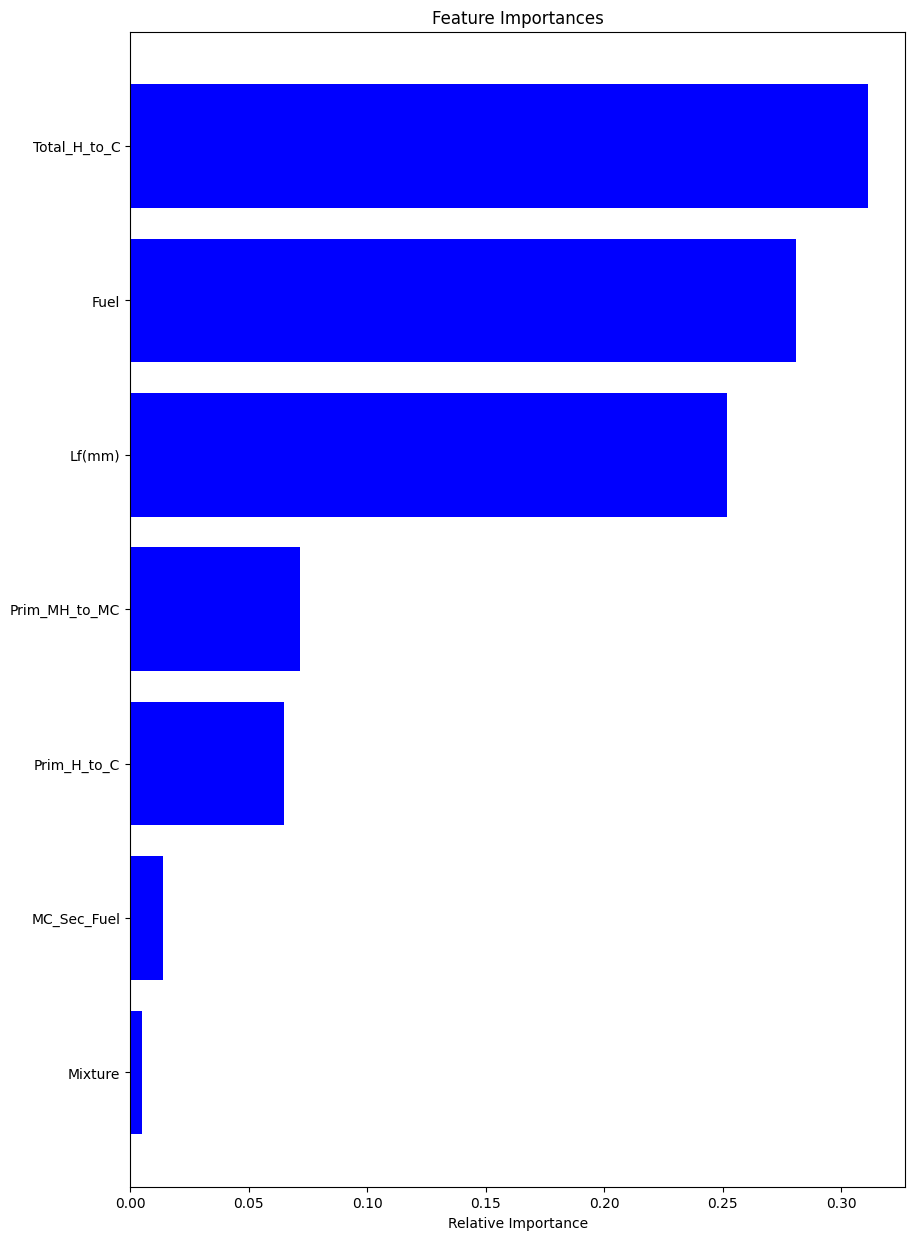

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import train_test_split
# Spliiting data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(
                                        data_df.drop(['PAH', 'Experiments', 'Experiment_Num'], axis=1), data_df['PAH'], test_size=0.20, random_state=0)
# fitting the model
model = ExtraTreesRegressor(n_estimators=500, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# plotting feature importances
features = data_df.drop('PAH', axis = 1).columns
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
data_df

,Lf(mm),Fuel,Prim_MH_to_MC,Prim_H_to_C,Mixture,MC_Sec_Fuel,Total_H_to_C,PAH,Experiments,Experiment_Num
S/No,,,,,,,,,,
1,1.243198,28,0.166667,2.0,16,0.0,2.00,696.493713,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
2,1.759619,28,0.166667,2.0,16,0.0,2.00,931.000000,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
3,2.240685,28,0.166667,2.0,16,0.0,2.00,1187.902954,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
4,2.757107,28,0.166667,2.0,16,0.0,2.00,1504.963989,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
5,3.238173,28,0.166667,2.0,16,0.0,2.00,1838.769775,"Fuel: C2H4, Mixture: 0% CH4",Exp. 1
...,...,...,...,...,...,...,...,...,...,...
654,5.763478,16,0.333333,4.0,2,0.0,4.14,13.355160,"Fuel: CH4, Mixture: 7% H2",Exp. 57
655,6.275609,16,0.333333,4.0,2,0.0,4.14,17.107885,"Fuel: CH4, Mixture: 7% H2",Exp. 57
656,6.752387,16,0.333333,4.0,2,0.0,4.14,21.247526,"Fuel: CH4, Mixture: 7% H2",Exp. 57


In [35]:
# Scaling the columns individually using log10

data_df[['Fuel']] = np.log10(data_df[['Fuel']])/10

data_df['Total_H_to_C'] = np.log10(data_df['Total_H_to_C'])

In [36]:
# Extracting the independent features
data_dfX = (data_df[['Lf(mm)', 'Fuel', 'Prim_MH_to_MC',
       'MC_Sec_Fuel', 'Total_H_to_C']])

In [37]:
data_dfX

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C
S/No,,,,,
1,1.243198,0.144716,0.166667,0.0,0.30103
2,1.759619,0.144716,0.166667,0.0,0.30103
3,2.240685,0.144716,0.166667,0.0,0.30103
4,2.757107,0.144716,0.166667,0.0,0.30103
5,3.238173,0.144716,0.166667,0.0,0.30103
...,...,...,...,...,...
654,5.763478,0.120412,0.333333,0.0,0.61700
655,6.275609,0.120412,0.333333,0.0,0.61700
656,6.752387,0.120412,0.333333,0.0,0.61700


In [38]:
# Scaling the target column
data_df['PAH'] = np.log10(data_df['PAH'])/10

In [39]:
data_df['PAH']

S/No
1      0.284292
2      0.296895
3      0.307478
4      0.317753
5      0.326453
         ...   
654    0.112565
655    0.123320
656    0.132731
657    0.142141
658    0.150440
Name: PAH, Length: 658, dtype: float32

In [40]:
#train_X, test_X, train_y, test_y = train_test_split(data_dfX, data_df['PAH'],test_size=0.3,random_state=0)

In [41]:
# Deriving the model equation

X_features = data_dfX.copy()
y_values = data_df['PAH'].copy()

In [42]:
#data_df['Fuel'] = np.log10(data_df['Fuel'])

In [43]:
# Deriving the model equation

X_features = data_dfX.copy()
y_values = data_df['PAH']

In [44]:
#reg.score(test_X,test_y)

In [113]:
train_X = X_features[0:441]
train_y = y_values[0:441]
train_X, train_y

(        Lf(mm)      Fuel  Prim_MH_to_MC  MC_Sec_Fuel  Total_H_to_C
 S/No                                                              
 1     1.243198  0.144716       0.166667          0.0      0.301030
 2     1.759619  0.144716       0.166667          0.0      0.301030
 3     2.240685  0.144716       0.166667          0.0      0.301030
 4     2.757107  0.144716       0.166667          0.0      0.301030
 5     3.238173  0.144716       0.166667          0.0      0.301030
 ...        ...       ...            ...          ...           ...
 437   4.239950  0.147712       0.250000          7.2      0.535113
 438   4.756371  0.147712       0.250000          7.2      0.535113
 439   5.247792  0.147712       0.250000          7.2      0.535113
 440   5.774569  0.147712       0.250000          7.2      0.535113
 441   6.265990  0.147712       0.250000          7.2      0.535113
 
 [441 rows x 5 columns],
 S/No
 1      0.284292
 2      0.296895
 3      0.307478
 4      0.317753
 5      0.32645

In [114]:
test_X = X_features[441:658]
test_y = y_values[441:658]
test_X,test_y

(        Lf(mm)      Fuel  Prim_MH_to_MC  MC_Sec_Fuel  Total_H_to_C
 S/No                                                              
 442   1.243198  0.144716       0.166667          0.0       0.30103
 443   1.759619  0.144716       0.166667          0.0       0.30103
 444   2.265685  0.144716       0.166667          0.0       0.30103
 445   2.746752  0.144716       0.166667          0.0       0.30103
 446   3.263173  0.144716       0.166667          0.0       0.30103
 ...        ...       ...            ...          ...           ...
 654   5.763478  0.120412       0.333333          0.0       0.61700
 655   6.275609  0.120412       0.333333          0.0       0.61700
 656   6.752387  0.120412       0.333333          0.0       0.61700
 657   7.264518  0.120412       0.333333          0.0       0.61700
 658   7.751650  0.120412       0.333333          0.0       0.61700
 
 [217 rows x 5 columns],
 S/No
 442    0.281663
 443    0.294652
 444    0.305896
 445    0.315473
 446    0.32476

In [115]:
#data_df[['Fuel', 'Mixture']] = (data_df[['Fuel', 'Mixture']])/10

In [116]:
# data_df['PAH'] = (data_df['PAH'])/10

In [117]:
## Runing all the available regressors on the train and test

In [118]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score,max_error

In [119]:
from time import time

from sklearn.linear_model import LinearRegression, RANSACRegressor,Ridge,Lasso, SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor 
from sklearn.ensemble import AdaBoostRegressor, VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [120]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
regressors = [
    SGDRegressor(),
    RANSACRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ExtraTreesRegressor(),
    BaggingRegressor(estimator=ExtraTreesRegressor()),
    GradientBoostingRegressor(learning_rate=0.3),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    BaggingRegressor(estimator=RandomForestRegressor()),
    GradientBoostingRegressor(),
    BaggingRegressor(estimator=GradientBoostingRegressor()),
    AdaBoostRegressor(),
    KNeighborsRegressor(),
    VotingRegressor([("gb", reg1), ("rf", reg2)])
    
]

In [121]:
head = 15
for model in regressors[:head]:
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    mx = float(98/100)
    start = time()
    for num in range(10):
        y_pred = model.predict(test_X)
        test_score = r2_score(test_y, y_pred)
        if(test_score > mx):
            mx = test_score
            print(mx)
    #start = time()
    #y_pred = model.predict(test_X)
    predict_time = time()-start    
    if(test_score>0.97):
        print(model)
        print("\tTraining time: %0.3fs" % train_time)
        print("\tPrediction time: %0.3fs" % predict_time)
        print("\tExplained variance:", explained_variance_score(test_y, y_pred))
        print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
        print("\tMean squared error:", mean_squared_error(test_y,y_pred))
        print("\tR2 training score:", model.score(train_X, train_y))
        print("\tR2 test score:", r2_score(test_y, y_pred))
        print("\tR2 Maximum Error:", max_error(test_y, y_pred))
        print()
print('Simulation Completed')

0.9834868864965609
ExtraTreesRegressor()
	Training time: 0.318s
	Prediction time: 0.213s
	Explained variance: 0.9835606178459899
	Mean absolute error: 0.009331578805458984
	Mean squared error: 0.0001672235814373675
	R2 training score: 1.0
	R2 test score: 0.9834868864965609
	R2 Maximum Error: 0.051491285562515254

0.9812346623293408
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time: 3.440s
	Prediction time: 1.729s
	Explained variance: 0.9812380277598213
	Mean absolute error: 0.009302440093255131
	Mean squared error: 0.00019003121195258868
	R2 training score: 0.9983662467579083
	R2 test score: 0.9812346623293408
	R2 Maximum Error: 0.06805866330862048

GradientBoostingRegressor()
	Training time: 0.109s
	Prediction time: 0.029s
	Explained variance: 0.9727917055889842
	Mean absolute error: 0.013069094122653183
	Mean squared error: 0.000279554791293798
	R2 training score: 0.9945258426351509
	R2 test score: 0.9723943240577363
	R2 Maximum Error: 0.04764412345347657

BaggingRegre

In [122]:
better_model = ExtraTreesRegressor(n_jobs=-1,random_state=None)
best_model = BaggingRegressor(estimator=ExtraTreesRegressor()) 
best_regressors = [
    better_model,
    best_model]
head = 2
for model in best_regressors[:head]:
    start = time()
    model.fit(train_X, train_y)
    train_time = time() - start
    mx = float(980/1000)
    start = time()
    while(mx <= 0.980):
        y_pred = model.predict(test_X)
        predict_time = time()-start
        test_score = r2_score(test_y, y_pred)
        if(test_score > mx):
            mx = test_score
            print(mx)    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
    print("\tMean squared error:", mean_squared_error(test_y,y_pred))
    print("\tR2 training score:", model.score(train_X, train_y))
    print("\tR2 test score:", r2_score(test_y, y_pred))
    print()
print('Simulation Completed')

0.982801207053957
ExtraTreesRegressor(n_jobs=-1)
	Training time: 0.319s
	Prediction time: 0.034s
	Explained variance: 0.9828014827517615
	Mean absolute error: 0.009154171329592503
	Mean squared error: 0.00017416726120353152
	R2 training score: 1.0
	R2 test score: 0.982801207053957

0.9820819330633991
BaggingRegressor(estimator=ExtraTreesRegressor())
	Training time: 3.338s
	Prediction time: 0.172s
	Explained variance: 0.9821060680624054
	Mean absolute error: 0.009291069935406402
	Mean squared error: 0.00018145114335639182
	R2 training score: 0.9978301991780246
	R2 test score: 0.9820819330633991

Simulation Completed


In [123]:
better_model.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
BaggingRegressor(base_estimator=ExtraTreesRegressor()).get_params(deep=True)

{'base_estimator__bootstrap': False,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'squared_error',
 'base_estimator__max_depth': None,
 'base_estimator__max_features': 1.0,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': ExtraTreesRegressor(),
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [125]:
ExtraTreesRegressor().get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [126]:
# Runing iterations to get best R2 score
param=[]
best_regress = ExtraTreesRegressor(n_jobs=-1,random_state=None)
best_mx = float(980/1000)

while(best_mx <= 0.986):
    start = time()
    best_regress.fit(train_X,train_y)
    train_time = time() - start
    start = time()
    y_pred = best_regress.predict(test_X)
    test_score = r2_score(test_y, y_pred)
    # print(test_score)
    if(test_score > best_mx):
        best_mx = test_score
        print(best_mx)
    predict_time = time()-start 

print(best_regress)
print("\tTraining time= %0.3fs" % train_time)
print("\tPrediction time= %0.3fs" % predict_time)
print("\tExplained variance=", explained_variance_score(test_y, y_pred))
print("\tMean absolute error=", mean_absolute_error(test_y, y_pred))
print("\tMean squared error=", mean_squared_error(test_y,y_pred))
print("\tR2 training score=", best_regress.score(train_X, train_y))
#rint("\tR2 test score=", r2_score(test_y, y_pred))
print("\tR2 test score=", best_mx)
print("\tR2 Maximum Error:", max_error(test_y, y_pred))

print()



0.9829430034226441
0.9843871649637451
0.9844076132221627
0.9846629766490763
0.9847348494040296
0.9856640761903942
0.9860900397276373
ExtraTreesRegressor(n_jobs=-1)
	Training time= 0.225s
	Prediction time= 0.031s
	Explained variance= 0.9861515214175518
	Mean absolute error= 0.00842218166689307
	Mean squared error= 0.00014086219257873752
	R2 training score= 1.0
	R2 test score= 0.9860900397276373
	R2 Maximum Error: 0.04880284562706946



In [127]:
best_regress.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [128]:
best_score = str(round(best_mx*10000))
best_score

'9861'

In [129]:
import pickle

# Saving the best regressor as a pickle file
best_score = str(round(best_mx*10000))
model_name = "best_regress_" + best_score +".pkl"
pickle.dump(best_regress, open(model_name, 'wb')) # stored as binary file
model_name

'best_regress_9861.pkl'

In [130]:
import pickle

# Importing the best regressor as a pickle file
model_name = 'best_regress_9865.pkl'
pickled_model = pickle.load(open(model_name, 'rb')) # read as binary file


In [131]:
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C
S/No,,,,,
442,1.243198,0.144716,0.166667,0.0,0.30103
443,1.759619,0.144716,0.166667,0.0,0.30103
444,2.265685,0.144716,0.166667,0.0,0.30103
445,2.746752,0.144716,0.166667,0.0,0.30103
446,3.263173,0.144716,0.166667,0.0,0.30103
...,...,...,...,...,...
654,5.763478,0.120412,0.333333,0.0,0.61700
655,6.275609,0.120412,0.333333,0.0,0.61700
656,6.752387,0.120412,0.333333,0.0,0.61700


In [132]:
import warnings
warnings.filterwarnings('ignore')

In [133]:
test_X['PAH'] = test_y
test_X['Pred_PAH'] = y_pred
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,0.144716,0.166667,0.0,0.30103,0.281663,0.284292
443,1.759619,0.144716,0.166667,0.0,0.30103,0.294652,0.296895
444,2.265685,0.144716,0.166667,0.0,0.30103,0.305896,0.306285
445,2.746752,0.144716,0.166667,0.0,0.30103,0.315473,0.316376
446,3.263173,0.144716,0.166667,0.0,0.30103,0.324760,0.325613
...,...,...,...,...,...,...,...
654,5.763478,0.120412,0.333333,0.0,0.61700,0.112565,0.111826
655,6.275609,0.120412,0.333333,0.0,0.61700,0.123320,0.123181
656,6.752387,0.120412,0.333333,0.0,0.61700,0.132731,0.133191


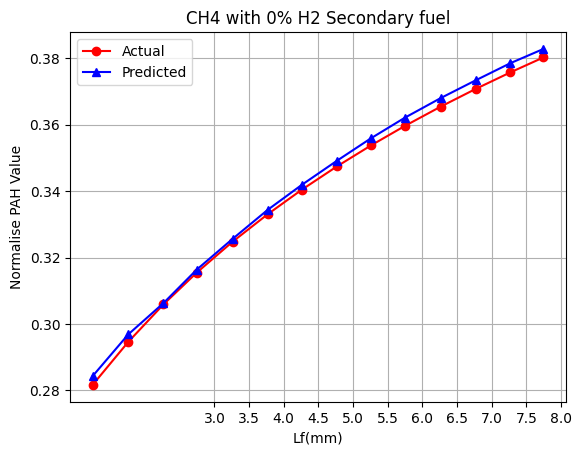

In [134]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][0:14]
y_actual = test_X['PAH'][0:14]
y_pred = test_X['Pred_PAH'][0:14]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




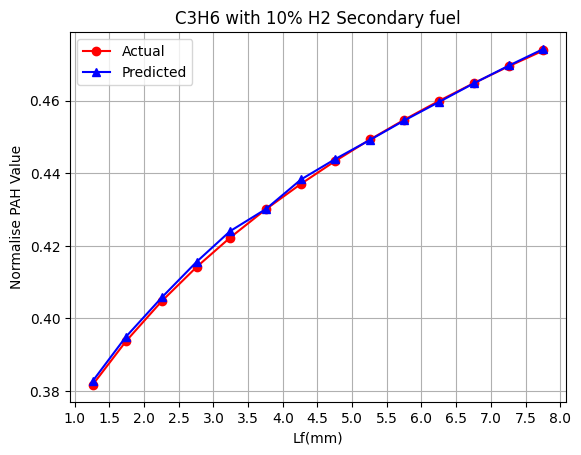

In [135]:
# Plotting Graphs for Propene(C3H8) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][14:28]
y_actual = test_X['PAH'][14:28]
y_pred = test_X['Pred_PAH'][14:28]

axes.set_title('C3H6 with 10% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

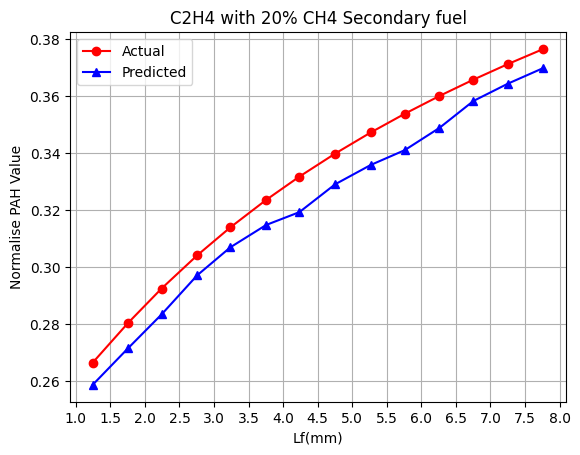

In [136]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][28:42]
y_actual = test_X['PAH'][28:42]
y_pred = test_X['Pred_PAH'][28:42]

axes.set_title('C2H4 with 20% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

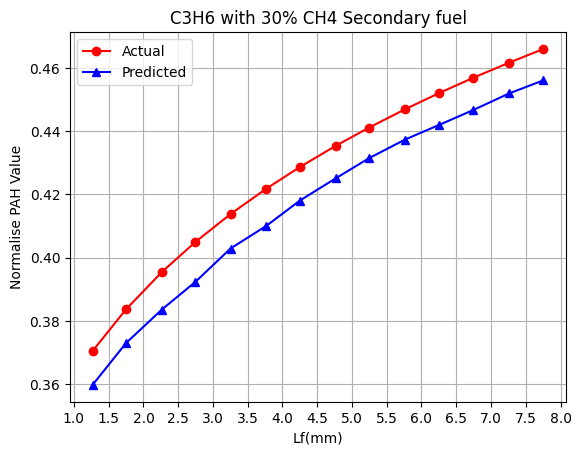

In [137]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][42:56]
y_actual = test_X['PAH'][42:56]
y_pred = test_X['Pred_PAH'][42:56]

axes.set_title('C3H6 with 30% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

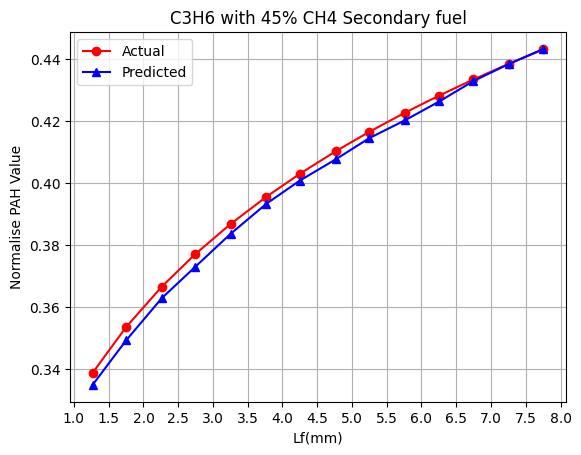

In [138]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][56:70]
y_actual = test_X['PAH'][56:70]
y_pred = test_X['Pred_PAH'][56:70]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

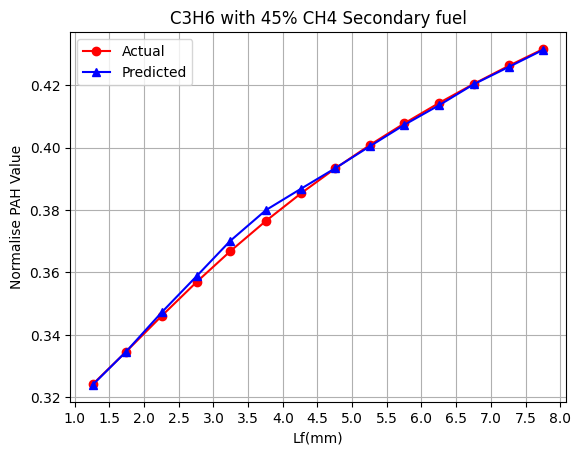

In [139]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][70:84]
y_actual = test_X['PAH'][70:84]
y_pred = test_X['Pred_PAH'][70:84]

axes.set_title('C3H6 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

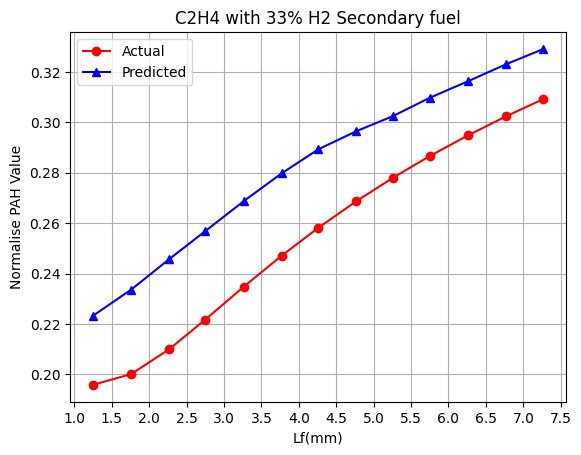

In [140]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:97]
y_actual = test_X['PAH'][84:97]
y_pred = test_X['Pred_PAH'][84:97]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

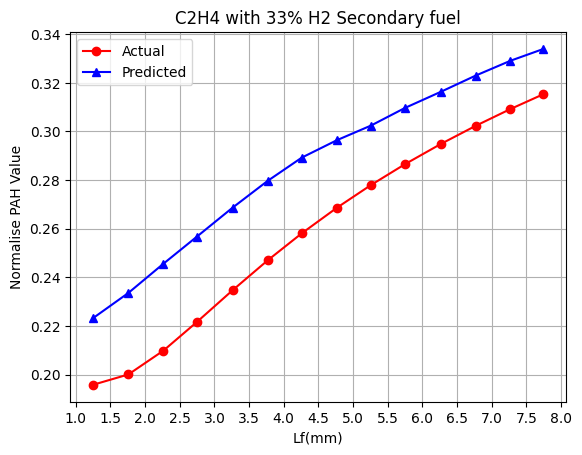

In [141]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][84:98]
y_actual = test_X['PAH'][84:98]
y_pred = test_X['Pred_PAH'][84:98]

axes.set_title('C2H4 with 33% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

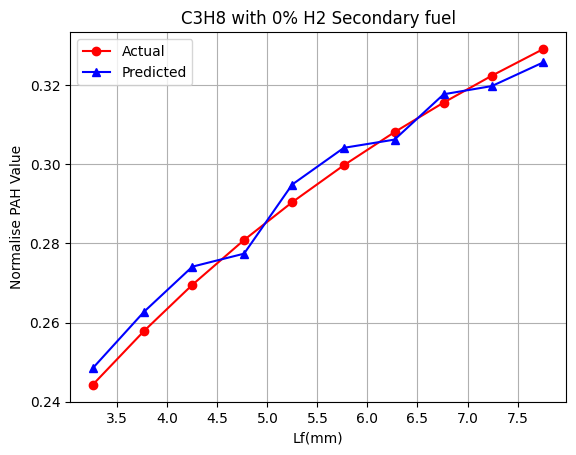

In [142]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][98:108]
y_actual = test_X['PAH'][98:108]
y_pred = test_X['Pred_PAH'][98:108]

axes.set_title('C3H8 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

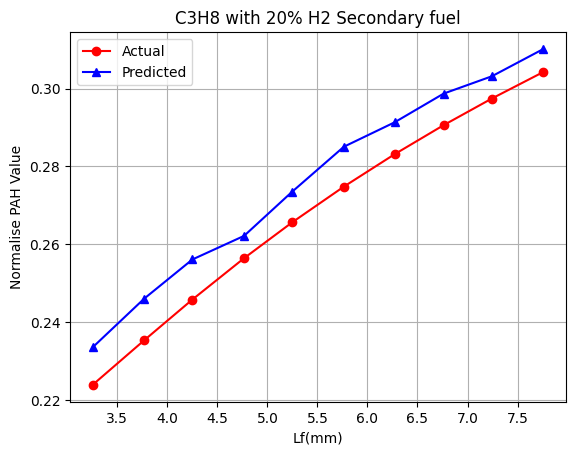

In [143]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][108:118]
y_actual = test_X['PAH'][108:118]
y_pred = test_X['Pred_PAH'][108:118]

axes.set_title('C3H8 with 20% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

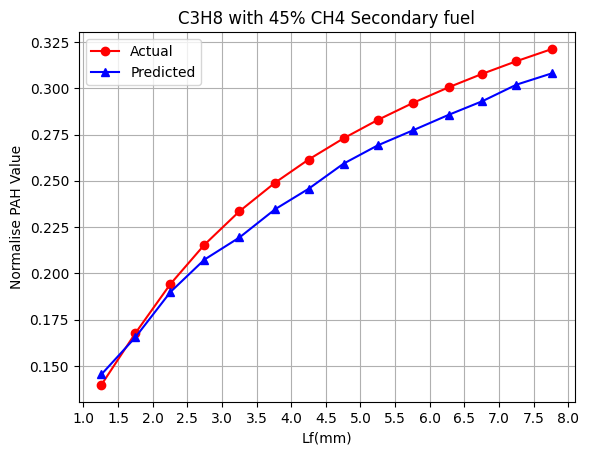

In [144]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][118:132]
y_actual = test_X['PAH'][118:132]
y_pred = test_X['Pred_PAH'][118:132]

axes.set_title('C3H8 with 45% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

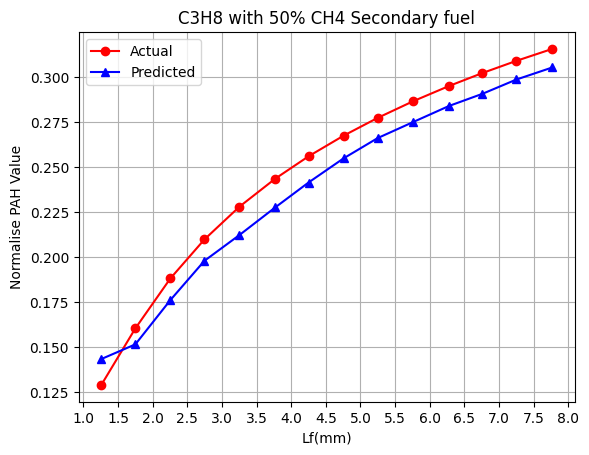

In [145]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][132:146]
y_actual = test_X['PAH'][132:146]
y_pred = test_X['Pred_PAH'][132:146]

axes.set_title('C3H8 with 50% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

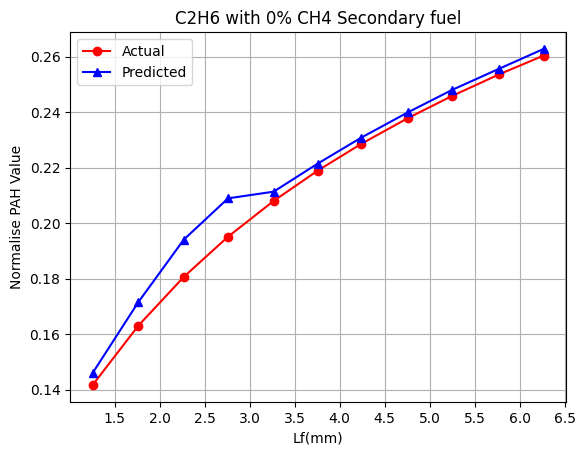

In [92]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][146:157]
y_actual = test_X['PAH'][146:157]
y_pred = test_X['Pred_PAH'][146:157]

axes.set_title('C2H6 with 0% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

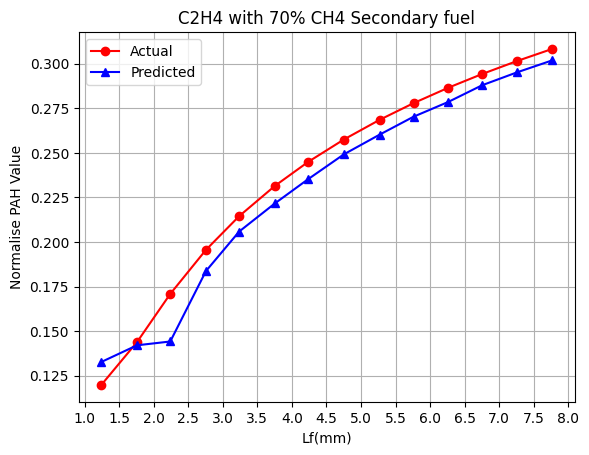

In [93]:
# Plotting Graphs for Ethene(C2H4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][157:171]
y_actual = test_X['PAH'][157:171]
y_pred = test_X['Pred_PAH'][157:171]

axes.set_title('C2H4 with 70% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

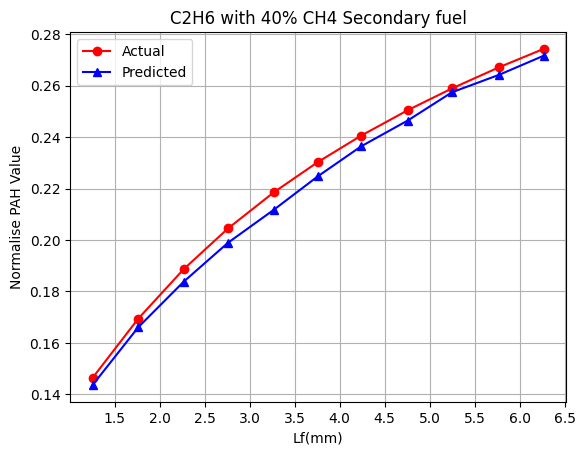

In [94]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][171:182]
y_actual = test_X['PAH'][171:182]
y_pred = test_X['Pred_PAH'][171:182]

axes.set_title('C2H6 with 40% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

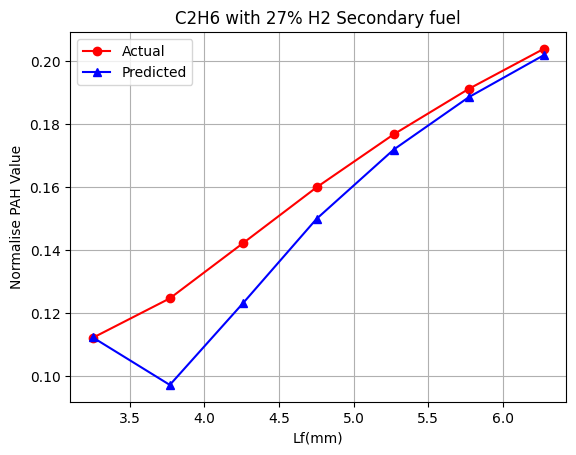

In [95]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][182:189]
y_actual = test_X['PAH'][182:189]
y_pred = test_X['Pred_PAH'][182:189]

axes.set_title('C2H6 with 27% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

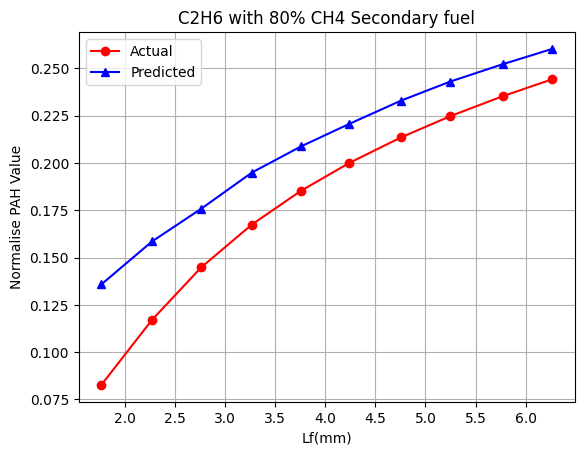

In [96]:
# Plotting Graphs for Ethane(C2H6) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][189:199]
y_actual = test_X['PAH'][189:199]
y_pred = test_X['Pred_PAH'][189:199]

axes.set_title('C2H6 with 80% CH4 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()

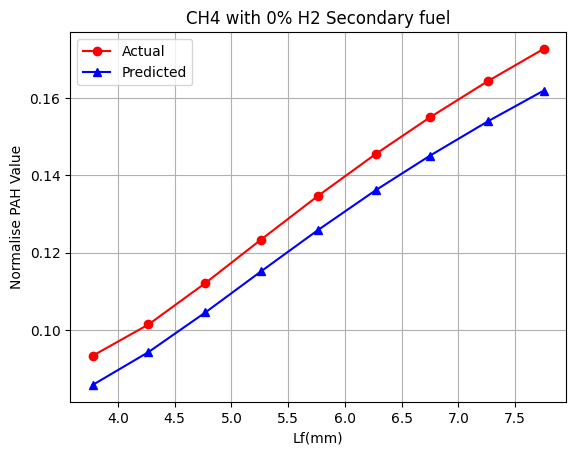

In [146]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][199:208]
y_actual = test_X['PAH'][199:208]
y_pred = test_X['Pred_PAH'][199:208]

axes.set_title('CH4 with 0% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()




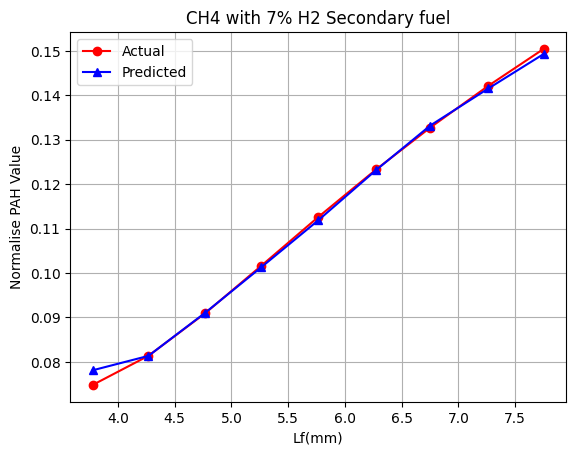

In [147]:
# Plotting Graphs for Methane(CH4) as Primary fuel
axes = plt.axes()
x = test_X['Lf(mm)'][208:217]
y_actual = test_X['PAH'][208:217]
y_pred = test_X['Pred_PAH'][208:217]

axes.set_title('CH4 with 7% H2 Secondary fuel')
axes.set_ylabel('Normalise PAH Value')
axes.set_xlabel('Lf(mm)')
axes.set_xticks([3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8])
plt.plot(x,y_actual,'o-', color = 'red', label='Actual')
plt.plot(x,y_pred, '^-', color = 'blue', label='Predicted')
plt.legend(loc='best')
plt.grid()


In [148]:
#Getting the entire dataframe of the test features
test_X

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,0.144716,0.166667,0.0,0.30103,0.281663,0.284292
443,1.759619,0.144716,0.166667,0.0,0.30103,0.294652,0.296895
444,2.265685,0.144716,0.166667,0.0,0.30103,0.305896,0.306285
445,2.746752,0.144716,0.166667,0.0,0.30103,0.315473,0.316376
446,3.263173,0.144716,0.166667,0.0,0.30103,0.324760,0.325613
...,...,...,...,...,...,...,...
654,5.763478,0.120412,0.333333,0.0,0.61700,0.112565,0.111826
655,6.275609,0.120412,0.333333,0.0,0.61700,0.123320,0.123181
656,6.752387,0.120412,0.333333,0.0,0.61700,0.132731,0.133191


In [149]:
# Extracting the column headings of the test dataframe
list(test_X.columns)

['Lf(mm)',
 'Fuel',
 'Prim_MH_to_MC',
 'MC_Sec_Fuel',
 'Total_H_to_C',
 'PAH',
 'Pred_PAH']

In [150]:
# Creating an empty dataframe for combining the output
test_output_df = pd.DataFrame()

In [151]:
test_output_df[['Lf(mm)','Prim_MH_to_MC','MC_Sec_Fuel']] = (test_X[['Lf(mm)','Prim_MH_to_MC','MC_Sec_Fuel']]) 

# Reversing the log of (pah, pred_pah)/10
test_output_df[['PAH','Pred_PAH']] = np.power(10,(test_X[['PAH','Pred_PAH']]*10))

# Reversing the log of 'Fuel', and 'Total_H_to_C'
test_output_df[['Fuel', 'Total_H_to_C']] = np.power(10,(test_X[['Fuel', 'Total_H_to_C']]))
test_output_df[["Lf(mm)",'Fuel', 'Prim_MH_to_MC','MC_Sec_Fuel','Total_H_to_C','PAH','Pred_PAH']]

,Lf(mm),Fuel,Prim_MH_to_MC,MC_Sec_Fuel,Total_H_to_C,PAH,Pred_PAH
S/No,,,,,,,
442,1.243198,1.395455,0.166667,0.0,2.00,655.583435,696.493623
443,1.759619,1.395455,0.166667,0.0,2.00,884.130310,930.999988
444,2.265685,1.395455,0.166667,0.0,2.00,1145.397217,1155.703325
445,2.746752,1.395455,0.166667,0.0,2.00,1427.994385,1458.021861
446,3.263173,1.395455,0.166667,0.0,2.00,1768.495239,1803.576854
...,...,...,...,...,...,...,...
654,5.763478,1.319508,0.333333,0.0,4.14,13.355160,13.129826
655,6.275609,1.319508,0.333333,0.0,4.14,17.107887,17.053507
656,6.752387,1.319508,0.333333,0.0,4.14,21.247528,21.474020


In [152]:
# Exporting Results
test_output_df.to_excel('Initial_PAH_Test_Results.xlsx')